# Airbnb data: Clean, Explore

I explored Airbnb listing data to find the cheapest time to travel to Denver in the winter.

The Airbnb listing price depends on various factor associated with the listing. The price of a particular listing also has a seasonal trend. The prices are usually higher over weekends, and in peak travel time like Christmas, New Years and other long weekends. Here, I looked at the seasonal trend and finding the best time to travel. At the same time, explore the Airbnb data to understand some underlying features in Airbnb listing.

I download the Airbnb listing price data for Denver, Colorado, from [Inside Airbnb](http://insideairbnb.com/get-the-data.html). This has a snapshot of listings available at a particular time, which should suffice for our purposes.
Source of data: http://insideairbnb.com/get-the-data.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

## Listing Data

The listing data contains 96 features for each of the 4984 listing in Denver, CO region.  

In [2]:
file_listing = '../data/listings.csv.gz'
listing = pd.read_csv(file_listing)
print('Number of entries: {:d}'.format(listing.shape[0]))
print('Number of columns: {:d}'.format(listing.shape[1]))
print('The columns are:')
listing.columns

Number of entries: 4984
Number of columns: 96
The columns are:


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

### Columns of interest:

There are too many columns in the original data set, which are not relevant to the task. So I trim the dataset to the interesting columns that I care about. 

Interesting columns:
1. id:  
2. host_id:  
3. host_is_superhost:  
4. neighbourhood_cleansed  
5. zipcode:  
6. latitude:  
7. longitude:  
8. is_location_exact:  
9. room_type:  
10. accommodates:  
11. bathrooms:  
12. bedrooms:  
13. beds:  
14. price:  
15. cleaning_fee:  
16. review_scores_rating:  
17. number_of_reviews:  


In [3]:
columns = ['id', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 
           'zipcode', 'latitude', 'longitude', 'is_location_exact', 'room_type', 
           'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 
           'cleaning_fee', 'review_scores_rating', 'number_of_reviews']
listing = listing[columns]

# Brief look at the data
listing.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,review_scores_rating,number_of_reviews
0,360,666,t,Highland,80211.0,39.767033,-105.002564,t,Entire home/apt,5,1.0,2,2.0,$140.00,$35.00,100.0,3
1,590,933,t,North Park Hill,80207.0,39.753609,-104.912373,t,Private room,3,1.0,1,1.0,$61.00,$10.00,96.0,540
2,592,933,t,North Park Hill,80207.0,39.754380,-104.911557,t,Private room,2,1.0,1,1.0,$42.00,$10.00,97.0,142
3,686,990,t,North Capitol Hill,80203.0,39.745030,-104.977564,t,Private room,2,2.0,1,1.0,$70.00,$10.00,95.0,232
4,1940,2150,t,Baker,80223.0,39.719810,-104.996487,t,Entire home/apt,2,1.0,0,1.0,$95.00,$75.00,99.0,21


### Data types in columns

In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 17 columns):
id                        4984 non-null int64
host_id                   4984 non-null int64
host_is_superhost         4984 non-null object
neighbourhood_cleansed    4984 non-null object
zipcode                   4916 non-null float64
latitude                  4984 non-null float64
longitude                 4984 non-null float64
is_location_exact         4984 non-null object
room_type                 4984 non-null object
accommodates              4984 non-null int64
bathrooms                 4981 non-null float64
bedrooms                  4984 non-null int64
beds                      4982 non-null float64
price                     4984 non-null object
cleaning_fee              4350 non-null object
review_scores_rating      4338 non-null float64
number_of_reviews         4984 non-null int64
dtypes: float64(6), int64(5), object(6)
memory usage: 662.0+ KB


### Missing entries

Count the number of missing entry in each column

In [5]:
print('Number of entries is {0:d} '.format(listing.shape[0]))

listing.isnull().sum()

Number of entries is 4984 


id                          0
host_id                     0
host_is_superhost           0
neighbourhood_cleansed      0
zipcode                    68
latitude                    0
longitude                   0
is_location_exact           0
room_type                   0
accommodates                0
bathrooms                   3
bedrooms                    0
beds                        2
price                       0
cleaning_fee              634
review_scores_rating      646
number_of_reviews           0
dtype: int64

### Data Cleaning

1. Drop the column zipcode and is_location_exact. Location information from latitude, longitude and neighbourhood_cleansed should be sufficient for the task.
2. Drop entries with missing values in bathrooms and beds.
3. Replane Nan in cleaning_fee to 0
4. Replace host_is_superhost values with t:1 and f:0
5. Format price and cleaning_fee to float. 
6. Remove luxury listing (price >9998)

In [6]:
# Drop zipcode and is_location_exact column
listing = listing.drop(columns=['zipcode', 'is_location_exact'])

# Drop entries with missing values in bathrooms and beds
og_len = listing.shape[0]
listing = listing.dropna(how='any', subset=['bathrooms', 'beds'])


# Replace NaN in cleaning price
listing['cleaning_fee'] = listing['cleaning_fee'].fillna('0')

# Make host_is_superhost binary
listing = listing.replace({'host_is_superhost':{'t':1, 'f':0}})

# Format price and cleaning_free
listing[['price', 'cleaning_fee']] = listing[['price', 'cleaning_fee']].replace(
                                    '[\$,]', '', regex=True).astype(float)

# Remove luxury entries
listing = listing[listing['price']<9998]
print('Number of entries dropped: {0:d}'.format(og_len - listing.shape[0]))
print('Number of remaining entries: {0:d}'.format(listing.shape[0]))

# # Set id as index
# listing = listing.set_index('id')

Number of entries dropped: 13
Number of remaining entries: 4971


## Calendar data

The calendar data has the price for a listing at each available date in the the uncoming year. 

In [7]:
file_calendar = '../data/calendar.csv.gz'
calendar = pd.read_csv(file_calendar)
print('Number of entries: {:d}'.format(calendar.shape[0]))
print('Number of columns: {:d}'.format(calendar.shape[1]))
print('The columns are:')
calendar.head()

Number of entries: 1819160
Number of columns: 4
The columns are:


,listing_id,date,available,price
0,360,2019-08-22,t,$149.00
1,360,2019-08-21,t,$149.00
2,360,2019-08-20,t,$149.00
3,360,2019-08-19,t,$149.00
4,360,2019-08-18,t,$149.00


### Missing entries

Importand feature to note is that the Airbnb calendar data for a listing does not differentiate between a booked night vs an unavailable night, therefore these bookings are counted as "unavailable". 

In [8]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         1112781
dtype: int64

### Data cleaning

1. Drop available. Available has t or f values. When available == 'f', price shows a NaN value. So available is redundant
2. Drop all entries with NaN
3. Convert price to numeric format
4. Convert data to numpy date time format
5. Rename listing_id to id
6. Crop the dates from 1st December 2018 to 30th April 2019. 

In [9]:
# Drop available
calendar = calendar.drop(columns=['available'])

# # Drop NaN entries
# og_len = calendar.shape[0]
# calendar = calendar.dropna(how='any', subset=['price'])
# print('Number of entries dropped: {0:d}'.format(og_len - calendar.shape[0]))
# print('Number of remaining entries: {0:d}'.format(listing.shape[0]))

# Format price and cleaning_free
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert date-time format
calendar['date'] = pd.to_datetime(calendar['date'], yearfirst=True)

# Rename 
calendar = calendar.rename(index=str, columns={'listing_id': 'id'});

# Crop dates
calendar = calendar[(calendar['date'] >= '2018-12-01') & (calendar['date'] <= '2019-04-30')]
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752584 entries, 114 to 1819063
Data columns (total 3 columns):
id       752584 non-null int64
date     752584 non-null datetime64[ns]
price    314332 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.0+ MB


In [10]:
calendar.groupby(['date']).size().reset_index(name='counts').head(5)

,date,counts
0,2018-12-01,4984
1,2018-12-02,4984
2,2018-12-03,4984
3,2018-12-04,4984
4,2018-12-05,4984


In [11]:
median_price = calendar.groupby('id')['price'].median().reset_index(name='price')
median_price = median_price.set_index('id')

## Data Exploration

Trying to look at some general trends and structure in the data. While also gaining some insight into the data

##### Number of apartments vs accomodates

We can observe that apartments with accomodates of multiple of two are more popular. I would guess that this is because most listing would use a standard bed which accommodates two people. So the number of accommodates goes along with it. And fewer apartments have bed/couch for single person. 

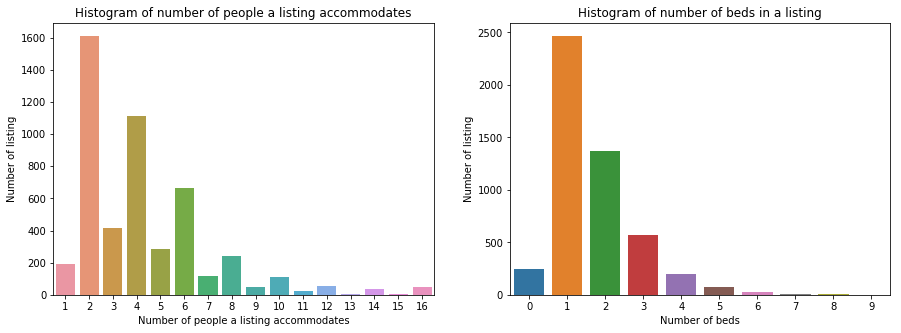

In [12]:
f, axs = plt.subplots(1,2,figsize=(15,5));

# Subplot 1 (Error in eigen_value)
sns.countplot(x='accommodates', data=listing, ax=axs[0])
axs[0].set_title('Histogram of number of people a listing accommodates')
axs[0].set_xlabel('Number of people a listing accommodates')
axs[0].set_ylabel('Number of listing')

# # Subplot 2 (Error in eigen_ec)
sns.countplot(x='bedrooms', data=listing, ax=axs[1])
axs[1].set_title('Histogram of number of beds in a listing')
axs[1].set_xlabel('Number of beds')
axs[1].set_ylabel('Number of listing');

#### Histogram of number of bathrooms

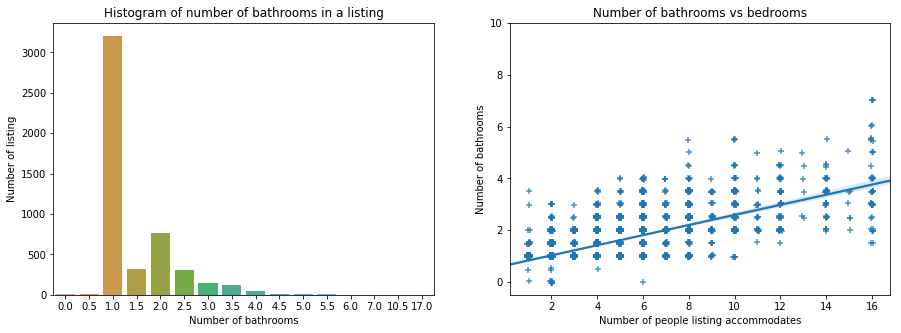

In [13]:
f, axs = plt.subplots(1,2,figsize=(15,5));

# Subplot 1 (Error in eigen_value)
sns.countplot(x='bathrooms', data=listing, ax=axs[0])
axs[0].set_title('Histogram of number of bathrooms in a listing')
axs[0].set_xlabel('Number of bathrooms')
axs[0].set_ylabel('Number of listing')

# # Subplot 2 (Error in eigen_ec)
sns.regplot(x='accommodates', y='bathrooms', data=listing, ax=axs[1], marker='+', x_jitter=0.05, y_jitter=0.05)
axs[1].set_title('Number of bathrooms vs bedrooms')
axs[1].set_xlabel('Number of people listing accommodates')
axs[1].set_ylabel('Number of bathrooms')
axs[1].set_ylim([-0.5, 10]);

#### Price distribution

- Price is a function of number of people or number of bed in an apartment. So will fix each quantity and see how the price varies.

- Per person decreases slightly till the number of person a house accommodates increases till 3, after there isn't a significant difference in the price. 

- Note: Travel with at least couple of your friends. It is more fun and cheaper. Win-win! :-)

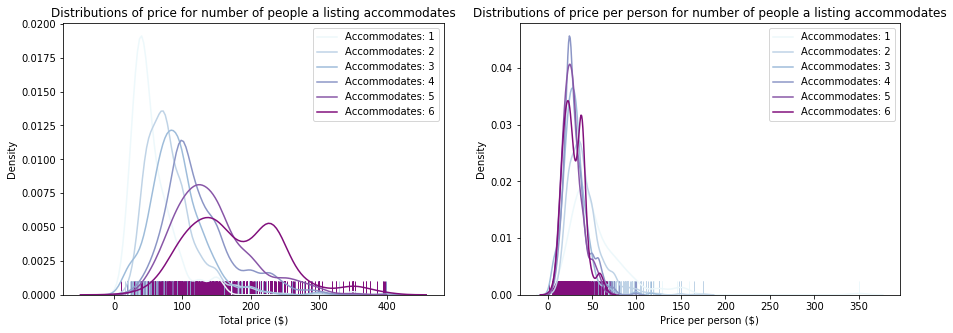

In [14]:
colors = ['#edf8fb', '#bfd3e6', '#9ebcda', '#8c96c6', '#8856a7', '#810f7c']


f, axs = plt.subplots(1,2,figsize=(15,5));

# Subplot 1 (Error in eigen_value)
for no_people in range(1,7):
    sns.distplot(listing[(listing['price']<400) & (listing['accommodates'] == no_people)]['price'],
                 bins=30, kde=True, hist=False, rug=True, label='Accommodates: {:d}'.format(no_people), 
                 ax=axs[0], color=colors[no_people-1])
axs[0].set_title('Distributions of price for number of people a listing accommodates')
axs[0].set_xlabel('Total price ($)')
axs[0].set_ylabel('Density')

# # Subplot 2 (Error in eigen_ec)

for no_people in range(1,7):
    sns.distplot(listing[(listing['price']<400) & (listing['accommodates'] == no_people)]['price']/no_people,
                 bins=30, kde=True, hist=False, rug=True, label='Accommodates: {:d}'.format(no_people), 
                 ax=axs[1], color=colors[no_people-1])
axs[1].set_title('Distributions of price per person for number of people a listing accommodates')
axs[1].set_xlabel('Price per person ($)')
axs[1].set_ylabel('Density');

#### Quantities correlating with price

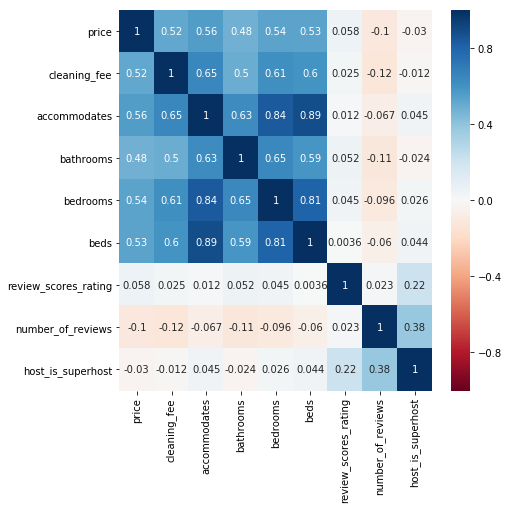

In [15]:
select_col = ['price', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms',
             'beds', 'review_scores_rating', 'number_of_reviews', 'host_is_superhost']
corrmat = listing[select_col].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap="RdBu");

#### Price seasonality

- Since the data looked at calendar listing snapshot at a particular date. The later dates have less number of listing compared to the listing closer by. 

- As we can see the plot, the number of listing sharply drop in late February 2019. This could be because some host would only make the calendar available to a certain amount of booking lead time. It seems that hosts who allow listing to be available till much later (refering them as *Advanced hosts*) are more advanced with Airbnb and their pricing might differ with the hosts who do not do this. If we just directly analyze the raw median price, we can observe that the raw median price allows increases around the same time. 

- *Adanvanced hosts* seem to apply much varied dynamic price changes over weekend compared to other hosts. 

- So in the analysis, I only look at listings which are also available in later months of winter. 

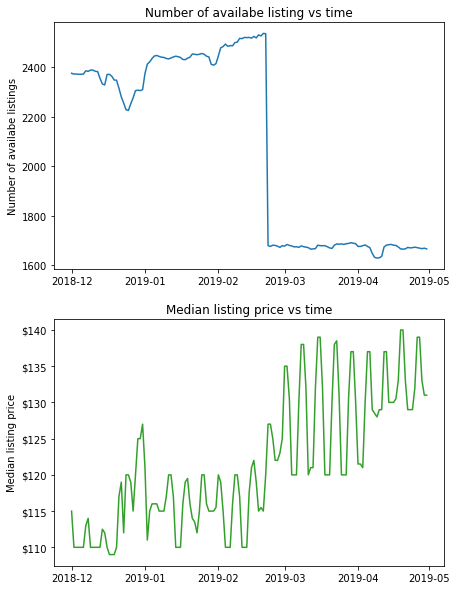

In [16]:
f, axs = plt.subplots(2,1,figsize=(7,10));

# Subplot 1 Number of listing available
listing_count = calendar.groupby('date')['price'].count().reset_index(name='count')
axs[0].plot(listing_count['date'], listing_count['count'], color='#1f78b4')
axs[0].set_title('Number of availabe listing vs time')
axs[0].set_ylabel('Number of availabe listings')

# Subplot 2: Median price:
median_price = calendar.groupby('date')['price'].median().reset_index(name='price')
axs[1].plot(median_price['date'], median_price['price'], color='#33a02c')
axs[1].set_yticklabels(['${0:0.0f}'.format(x) for x in axs[1].get_yticks()])
axs[1].set_title('Median listing price vs time')
axs[1].set_ylabel('Median listing price');

#### Select only advanced host listing in analysis

In [17]:
# Dates with listing only from Advanced hosts
sub_calendar = calendar[(calendar['date'] >= '2019-03-01') & (calendar['date'] < '2019-05-01')]
idx = sub_calendar['price'].notna()
advanced_host_id = sub_calendar[idx]['id'].unique()

print('Number of advanced host listing: {0:d}'.format(len(advanced_host_id)))


# Crop calendar to only advanced host listing:
advanced_calendar = calendar[calendar['id'].isin(advanced_host_id)]

Number of advanced host listing: 1740


#### Replot the count of listing and median price of listing for seasonal trends

Looking only at advanced host listing data we can observed taht the number of avaialbe listing decreases with future time. That makes sense. Moreover the sudden variability in the price has reduced after mid February in 2019. In general, however the prices do increase after March, this could be because more people visit Denver in warmer months compared to winter.


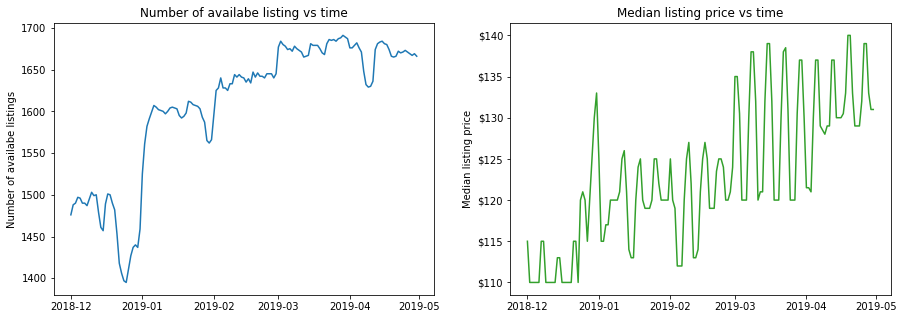

In [18]:
f, axs = plt.subplots(1,2,figsize=(15,5));

# Subplot 1 Number of listing available
listing_count = advanced_calendar.groupby('date')['price'].count().reset_index(name='count')
axs[0].plot(listing_count['date'], listing_count['count'], color='#1f78b4')
axs[0].set_title('Number of availabe listing vs time')
axs[0].set_ylabel('Number of availabe listings')

# Subplot 2: Median price:
median_price = advanced_calendar.groupby('date')['price'].median().reset_index(name='price')
axs[1].plot(median_price['date'], median_price['price'], color='#33a02c')
axs[1].set_yticklabels(['${0:0.0f}'.format(x) for x in axs[1].get_yticks()])
axs[1].set_title('Median listing price vs time')
axs[1].set_ylabel('Median listing price');

## Save croped advanced host data for calendar and listing for further analysis

In [19]:
advanced_listing = listing[listing['id'].isin(advanced_host_id)]

advanced_listing.to_csv('../data/advanced_listing.csv')
advanced_calendar.to_csv('../data/advanced_calendar.csv')